Dataset Information:

Column Names:
['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number', 'Sample', 'Sector', 'state', 'State_Region', 'District', 'Stratum_Number', 'Sub_Stratum', 'Schedule_type', 'Sub_Round', 'Sub_Sample', 'FOD_Sub_Region', 'Hamlet_Group_Sub_Block', 't', 'X_Stage_Stratum', 'HHS_No', 'Level', 'Filler', 'hhdsz', 'NIC_2008', 'NCO_2004', 'HH_type', 'Religion', 'Social_Group', 'Whether_owns_any_land', 'Type_of_land_owned', 'Land_Owned', 'Land_Leased_in', 'Otherwise_possessed', 'Land_Leased_out', 'Land_Total_possessed', 'During_July_June_Cultivated', 'During_July_June_Irrigated', 'NSS', 'NSC', 'MLT', 'land_tt', 'Cooking_code', 'Lighting_code', 'Dwelling_unit_code', 'Regular_salary_earner', 'Perform_Ceremony', 'Meals_seved_to_non_hhld_members', 'Possess_ration_card', 'Type_of_ration_card', 'MPCE_URP', 'MPCE_MRP', 'Person_Srl_No', 'Relation', 'Sex', 'Age', 'Marital_Status', 'Education', 'Days_Stayed_away', 'No_of_Meals_per_day', 'Meals_School', 'Meals_Empl

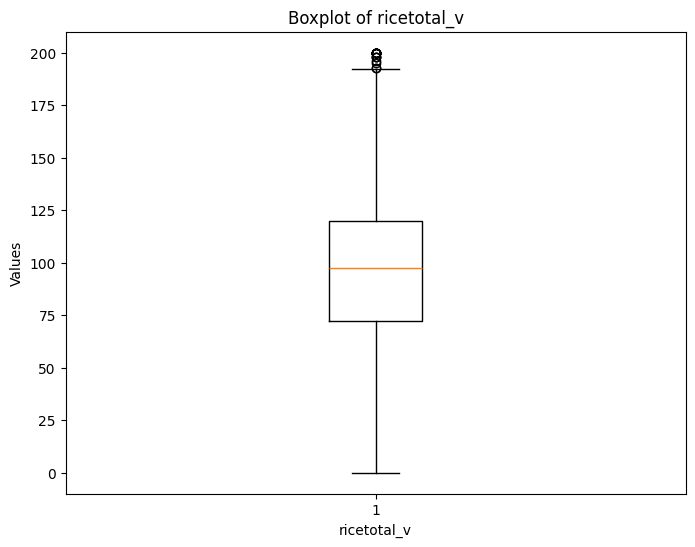


 top 4 consuming districts:
    District  total_consumption
27        28       49935.634789
18        19       42854.125036
12        13       40710.226226
34        35       40233.655844

 region consumption summary:
   Region  total_consumption
0       1      604218.321113
1       2      437706.497284

 sector consumption summary:
   Sector  total_consumption
0       1      773467.494205
1       2      268457.324192

 bottom 4 consuming districts
    District  total_consumption
33        34       18556.344877
32        33       17727.281471
2          3       15485.817063
37        38       13939.775758

 top 4 consuming districts:
   District  total_consumption
21       28       49935.634789
15       19       42854.125036
11       13       40710.226226
26       35       40233.655844

 region consumption summary:
   Region  total_consumption
0       1      604218.321113
1       2      437706.497284

 sector consumption summary:
  Sector  total_consumption
0  RURAL      773467.494205

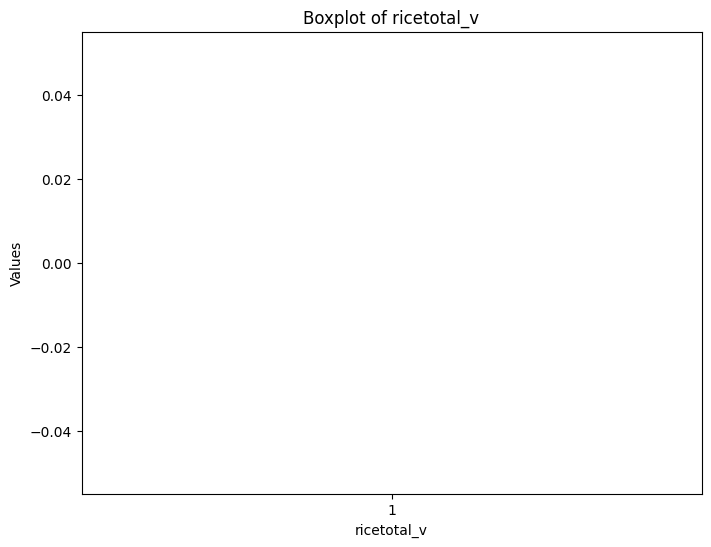


 top 4 consuming districts:
Empty DataFrame
Columns: [District, total_consumption]
Index: []

 region consumption summary:
Empty DataFrame
Columns: [Region, total_consumption]
Index: []

 sector consumption summary:
Empty DataFrame
Columns: [Sector, total_consumption]
Index: []

 bottom 4 consuming districts
Empty DataFrame
Columns: [District, total_consumption]
Index: []

 updated district summary(after mapping):
Empty DataFrame
Columns: [District, total_consumption]
Index: []

 region summary:
Empty DataFrame
Columns: [Region, total_consumption]
Index: []

 sector summary:
Empty DataFrame
Columns: [Sector, total_consumption]
Index: []
Empty DataFrame
Columns: [District, total_consumption]
Index: []

 updated district summary(after mapping):
Empty DataFrame
Columns: [District, total_consumption]
Index: []

 region summary:
Empty DataFrame
Columns: [Region, total_consumption]
Index: []

 sector summary:
Empty DataFrame
Columns: [Sector, total_consumption]
Index: []
Empty DataFrame
Col

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightstats.py:1544: RuntimeWarning: Mean of empty slice.
  x1_mean = x1.mean(0)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightstats.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice
  x1_var = x1.var(0)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightstats.py:1550: RuntimeWarning: Mean of empty slice.
  x2_mean = x2.mean(0)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/weightsta

ZeroDivisionError: float division by zero

In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as stests
df=pd.read_csv("/content/NSSO68 (1).csv", encoding="Latin-1", low_memory=False)
df.head()
state_data=df[df['state_1']=="Bhr"]
state_data.to_csv("../Filtered_state_data.csv", index=False)
print("Dataset Information:\n")
print("Column Names:")
print(state_data.columns.tolist())
print("\nFirst 5 rows:")
print(state_data.head())
print("\nDimensions(rows,columns):")
print(state_data.shape)
print("\nTotal Missing Values:")
print(state_data.isna().sum().sum())
state_data.isnull().sum().sort_values(ascending=False)
state_subset = state_data[[ 'state_1', 'District', 'Region',
                           'Sector', 'State_Region', 'Meals_At_Home', 'ricetotal_v',
                            'wheattotal_v', 'Milktotal_v', 'pulsestot_v', 'nonvegtotal_v',
                            'fruitstt_v', 'No_of_Meals_per_day' ]]
print("Missing Values Before Imputation:\n")
print(state_subset.isna().sum())
state_cleaned=state_subset.fillna(state_subset.mean(numeric_only=True))
print("\n missing values after imputation:\n")
print(state_cleaned.isna().sum())
def remove_outliers(df,column_name):
  Q1=df[column_name].quantile(0.25)
  Q3=df[column_name].quantile(0.75)
  IQR = Q3-Q1
  lower_threshold=Q1-1.5*IQR
  upper_threshold=Q3+1.5*IQR
  return df[(df[column_name]>=lower_threshold)&(df[column_name]<=upper_threshold)]
outlier_columns=['Meals_At_Home', 'ricetotal_v', 'wheattotal_v',
                   'Milktotal_v', 'pulsestot_v', 'nonvegtotal_v', 'fruitstt_v',
                   'No_of_Meals_per_day']
for col in outlier_columns:
  state_cleaned=remove_outliers(state_cleaned,col)
  print("\n columns in the cleaned dataset:")
  print(state_cleaned.columns.tolist())
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.boxplot(state_cleaned['ricetotal_v'])
plt.xlabel('ricetotal_v')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_v')
plt.show()
state_cleaned['total_consumption']=state_cleaned[['ricetotal_v',
'wheattotal_v', 'Milktotal_v', 'pulsestot_v', 'nonvegtotal_v',
'fruitstt_v']].sum(axis=1)
def summarize_consumption(df, group_col):
  summary = df.groupby(group_col)['total_consumption'].sum().reset_index()
  summary = summary.sort_values(by='total_consumption',
                                ascending=False)
  return summary
district_summary= summarize_consumption(state_cleaned,'District')
region_summary= summarize_consumption(state_cleaned,'Region')
sector_summary= summarize_consumption(state_cleaned,'Sector')
print("\n top 4 consuming districts:")
print(district_summary.head(4))
print("\n region consumption summary:")
print(region_summary)
print("\n sector consumption summary:")
print(sector_summary)
print("\n bottom 4 consuming districts")
print(district_summary.tail(4))
state_cleaned['District']= state_cleaned['District'].astype(str)
state_cleaned['Sector']= state_cleaned['Sector'].astype(str)
district_mapping={ "22":"Mumbai", "21": "Thane", "25":"Pune",
                  "34":"Kolhapur","12":"Gadchiroli", "17":"Parbhani",
                   "29":'Osmanabad',"16":"Hingoli" }
sector_mapping={"2":"URBAN","1":"RURAL"}
state_cleaned['District']=state_cleaned['District'].map(district_mapping).fillna(state_subset['District'])
state_cleaned['Sector']=state_cleaned['Sector'].map(sector_mapping).fillna(state_subset['Sector'])
district_summary= summarize_consumption(state_cleaned,'District')
region_summary= summarize_consumption(state_cleaned,'Region')
sector_summary= summarize_consumption(state_cleaned,'Sector')
print("\n top 4 consuming districts:")
print(district_summary.head(4))
print("\n region consumption summary:")
print(region_summary)
print("\n sector consumption summary:")
print(sector_summary.head(4))
print("\n bottom 4 consuming districts")
print(district_summary.head(4))
first_district=district_summary.head(2).iloc[0]['District']
last_district=district_summary.head(2).iloc[0]['District']
last_district
consumption_rural = state_cleaned[state_cleaned['Sector'] == 'RURAL']['total_consumption']
consumption_urban = state_cleaned[state_cleaned['Sector'] == 'URBAN']['total_consumption']
z_statistic, p_value = stests.ztest(consumption_rural, consumption_urban, alternative='two-sided')
print(" Z-Test for Rural vs Urban Consumption")
print("Z-Score:", round(z_statistic, 4))
print("P-Value:", round(p_value, 4))
if p_value < 0.05:
  print(" Significant difference between Rural and Urban mean consumption (Reject H₀)")
else: print(" No significant difference between Rural and Urban mean consumption (Fail to reject H₀)")
top_district = state_cleaned[state_cleaned['District'] ==
district_summary.head(1).iloc[0]['District']]['total_consumption']
bottom_district = state_cleaned[state_cleaned['District'] ==
district_summary.tail(1).iloc[0]['District']]['total_consumption']
z_statistic, p_value = stests.ztest(consumption_rural,
consumption_urban, alternative='two-sided')
print("Z test for top and bottom Consumption")
print("Z-Score:", round(z_statistic, 4))
print("P-Value:", round(p_value, 4))
if p_value < 0.05:
  print(f" Significant difference between {district_summary.head(1).iloc[0]['District']} and {district_summary.tail(1).iloc[0]['District']} mean consumption (Reject H₀)")
else:
  print(f" No significant difference between {district_summary.head(1).iloc[0]['District']} and {district_summary.tail(1).iloc[0]['District']} mean consumption (Fail to reject H₀)")
df.head()
state_data=df[df['state_1']=="BHR"]
state_data.to_csv("../Filtered_state_data.csv", index=False)
print("Dataset Information:\n")
print("Column Names:")
print(state_data.columns.tolist())
print("\nFirst 5 rows:")
print(state_data.head())
print("\nDimensions(rows,columns):")
print(state_data.shape)
print("\nTotal Missing Values:")
print(state_data.isna().sum().sum())
state_data.isnull().sum().sort_values(ascending=False)
state_subset = state_data[[ 'state_1', 'District', 'Region',
'Sector', 'State_Region', 'Meals_At_Home', 'ricetotal_v',
'wheattotal_v', 'Milktotal_v', 'pulsestot_v', 'nonvegtotal_v',
'fruitstt_v', 'No_of_Meals_per_day' ]]
print("Missing Values Before Imputation:\n")
print(state_subset.isna().sum())
state_cleaned=state_subset.fillna(state_subset.mean(numeric_only=True))
print("\n missing values after imputation:\n")
print(state_cleaned.isna().sum())
def remove_outliers(df,column_name):
  Q1=df[column_name].quantile(0.25)
  Q3=df[column_name].quantile(0.75)
  IQR = Q3-Q1
  lower_threshold=Q1-1.5
  IQR
  upper_threshold=Q3+1.5
  IQR
  return
  df[(df[column_name]>=lower_threshold)&(df[column_name]<=upper_threshold)]
  outlier_columns=['Meals_At_Home', 'ricetotal_v', 'wheattotal_v',
                   'Milktotal_v', 'pulsestot_v', 'nonvegtotal_v', 'fruitstt_v',
                   'No_of_Meals_per_day']
  for col in outlier_columns:
    state_cleaned=remove_outliers(state_cleaned,col)
    print("\n columns in the cleaned dataset:")
    print(state_cleaned.columns.tolist())
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.boxplot(state_cleaned['ricetotal_v'])
plt.xlabel('ricetotal_v')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_v')
plt.show()
state_cleaned['total_consumption']=state_cleaned[['ricetotal_v',
'wheattotal_v', 'Milktotal_v', 'pulsestot_v', 'nonvegtotal_v',
'fruitstt_v']].sum(axis=1)
def summarize_consumption(df, group_col):
  summary = df.groupby(group_col)['total_consumption'].sum().reset_index()
  summary = summary.sort_values(by='total_consumption',
                                ascending=False)
  return summary
district_summary= summarize_consumption(state_cleaned,'District')
region_summary= summarize_consumption(state_cleaned,'Region')
sector_summary= summarize_consumption(state_cleaned,'Sector')
print("\n top 4 consuming districts:")
print(district_summary.head(4))
print("\n region consumption summary:")
print(region_summary)
print("\n sector consumption summary:")
print(sector_summary)
print("\n bottom 4 consuming districts")
print(district_summary.head(4))
state_cleaned['District']= state_cleaned['District'].astype(str)
state_cleaned['Sector']= state_cleaned['Sector'].astype(str)
sector_mapping={"2":"URBAN","1":"RURAL"}
state_cleaned['District']=state_cleaned['District'].map(district_mapping).fillna(state_subset['District'])
state_cleaned['Sector']=state_cleaned['Sector'].map(sector_mapping).fillna(state_subset['Sector'])
district_summary= summarize_consumption(state_cleaned,'District')
region_summary= summarize_consumption(state_cleaned,'Region')
sector_summary= summarize_consumption(state_cleaned,'Sector')
print("\n updated district summary(after mapping):")
print(district_summary.head(4))
print("\n region summary:")
print(region_summary)
print("\n sector summary:")
print(sector_summary)
print(district_summary.tail(4))
state_cleaned['District']= state_cleaned['District'].astype(str)
state_cleaned['Sector']= state_cleaned['Sector'].astype(str)
district_mapping={ "3":"Sheohar", "6": "Supaul", "23":"Banka",
                  "25":"Lakhisarai","26":"Sheikhpura", "30":"Buxar",
                   "31":'Kaimur (Bhabua)',"37":"Jamui" }
sector_mapping={"2":"URBAN","1":"RURAL"}
state_cleaned['District']=state_cleaned['District'].map(district_mapping).fillna(state_subset['District'])
state_cleaned['Sector']=state_cleaned['Sector'].map(sector_mapping).fillna(state_subset['Sector'])
district_summary= summarize_consumption(state_cleaned,'District')
region_summary= summarize_consumption(state_cleaned,'Region')
sector_summary= summarize_consumption(state_cleaned,'Sector')
print("\n updated district summary(after mapping):")
print(district_summary.head(4))
print("\n region summary:")
print(region_summary)
print("\n sector summary:")
print(sector_summary)
print(district_summary.tail(4))
first_district=district_summary.head(2)['District']
last_district = district_summary.tail(2)['District']
last_district
consumption_rural = state_cleaned[state_cleaned['Sector'] == 'RURAL']['total_consumption']
consumption_urban = state_cleaned[state_cleaned['Sector'] == 'URBAN']['total_consumption']
z_statistic, p_value = stests.ztest(consumption_rural, consumption_urban, alternative='two-sided')
print(" Z-Test for Rural vs Urban Consumption")
print("Z-Score:", round(z_statistic, 4))
print("P-Value:", round(p_value, 4))
if p_value < 0.05:
  print(" Significant difference between Rural and Urban mean consumption (Reject H₀)")
else:
  print(" No significant difference between Rural and Urban mean consumption (Fail to reject H₀)")
top_district = state_cleaned[state_cleaned['District'] == district_summary.head(1).iloc[0]['District']]['total_consumption']
bottom_district = state_cleaned[state_cleaned['District'] == district_summary.tail(1).iloc[0]['District']]['total_consumption']
z_statistic, p_value = stests.ztest(consumption_rural,
consumption_urban, alternative='two-sided')
print("Z test for top and bottom Consumption")
print("Z-Score:", round(z_statistic, 4))
print("P-Value:", round(p_value, 4))
if p_value < 0.05:
  print(f" Significant difference between {district_summary.head(1).iloc[0]['District']} and {district_summary.tail(1).iloc[0]['District']} mean consumption (Reject H₀)")
else:
  print(f" No significant difference between {district_summary.head(1).iloc[0]['District']} and {district_summary.tail(1).iloc[0]['District']} mean consumption (Fail to reject H₀)")